# Ex 5

## Input

In [1]:
import random
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio 
png_renderer = pio.renderers["png"] 
pio.renderers.default = "png"

data = pd.read_csv('data/clusters.csv', header=None)
data.shape

(75, 3)

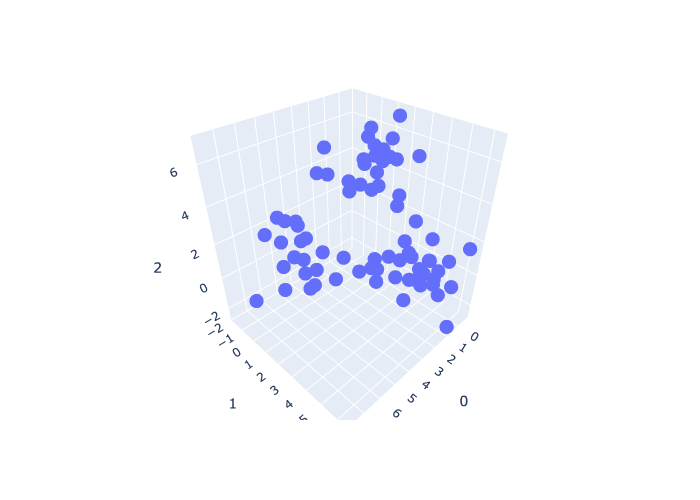

In [2]:
fig = px.scatter_3d(data, x=0, y=1, z=2)
fig.show()

## Solution 

In [3]:
def distances(point, centers):
    return np.sqrt(((centers-point)**2).sum(axis=1))

In [4]:
def k_means(data, n_clusters=3, max_iteration=100):
    data = data.copy()
    start_centers = np.array(data.iloc[np.random.choice(data.index, size=n_clusters, replace=False)])
    
    for iter_ in range(max_iteration):
        classes = np.array([np.argmin(distances(point, start_centers)) for point in np.array(data)])
        new_centers = np.array([data[classes == ind].mean().values for ind in range(n_clusters)])

        if (start_centers - new_centers).sum() == 0:
            break
        start_centers = new_centers
    return classes, new_centers

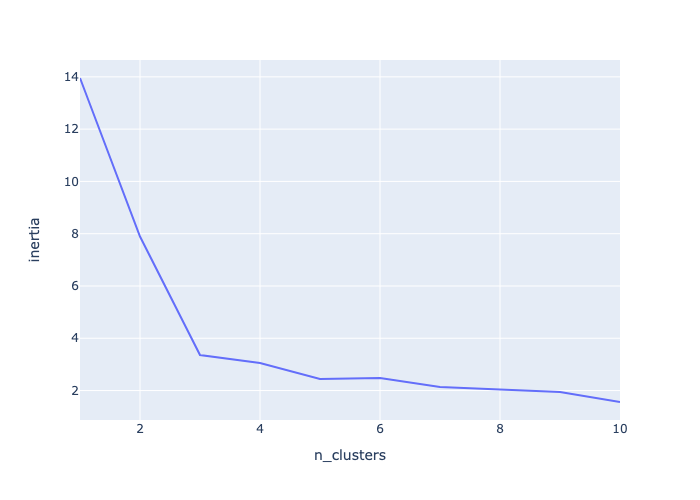

In [5]:
def elblow(data, max_clusters = 10):
    data_to_plot = []
    for n_clusters in range(1, max_clusters+1):
        classes, new_centers = k_means(data, n_clusters=n_clusters)
        
        inertia = (((data - new_centers[classes])**2).sum(axis=1)).mean()
        data_to_plot.append([n_clusters, inertia])
    return pd.DataFrame(data_to_plot, columns=['n_clusters', 'inertia'])


elbow_data = elblow(data)
fig = px.line(data_frame=elbow_data, x='n_clusters', y='inertia', )
fig.show()

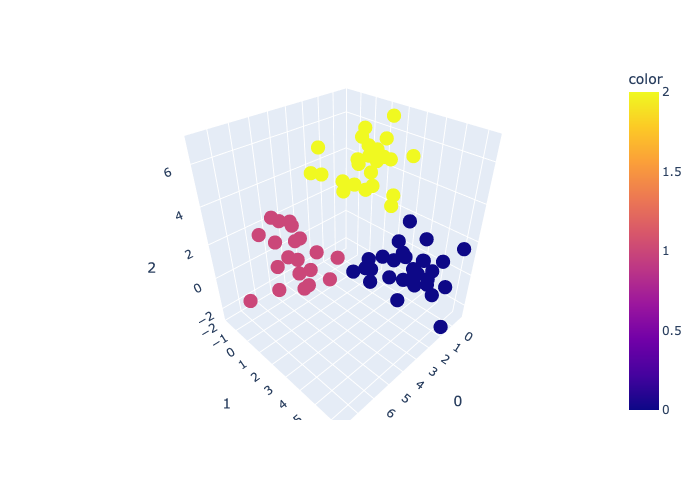

In [6]:
classes, new_centers = k_means(data, 3)

fig = px.scatter_3d(data, x=0, y=1, z=2, color=classes)
fig.show()